In [1]:
#import the require libraries
import pandas as pd
import numpy as np

#for plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read uber data from csv provided
uber = pd.read_csv('Uber Request Data.csv')

#analyse the data frame
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [3]:
#get brief information about the dataframe 
#Conclusion The timestamp column datatype are not in the required format , we need to fix that
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [4]:
#check the shape of the uber datafrane
uber.shape

(6745, 6)

##### After checking the Data for the timestamp , the requested/Drop Timestamp is not in the consistent format 
- MM-DD-YYYY HH24:MI 
- Strip the seconds from the timestamp ,to make it consistent as it will not have impact on the analysis

In [5]:
#Convert the date time to consistent format
uber['Request timestamp'] = uber['Request timestamp'].astype(str)
uber['Request timestamp'] = uber['Request timestamp'].str.replace('/','-')
uber['Request timestamp'] = pd.to_datetime(uber['Request timestamp'],dayfirst=True).values.astype('<M8[m]')

In [6]:
#analyse updated data
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:00,13-07-2016 09:25:47


In [7]:
#Convert the date time to consistent format
uber['Drop timestamp'] = uber['Drop timestamp'].astype(str)
uber['Drop timestamp'] = uber['Drop timestamp'].str.replace('/','-')
uber['Drop timestamp'] = pd.to_datetime(uber['Drop timestamp'],dayfirst=True).values.astype('<M8[m]')

In [8]:
#analyse updated data
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00


##### Check the Dataframe post cleaning up the dates

In [9]:
#Again check the datatype of the column after converting into consistent format
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.2+ KB


###### No column is required to be drop here as every column is useful in getting the business problem solved
- Analyis is required on the Metadata details like , the request id should be unique and others stuffs

In [10]:
#check whether the drop timestamp is null only due to Cancelled or No Cars Available reason
 #Conclusion - The drop time is expected to be null for the above two status 
uber[uber['Drop timestamp'].isnull()].Status.unique()

array(['Cancelled', 'No Cars Available'], dtype=object)

In [11]:
#check whether the Driver id is null due to driver "No Cars Available" reason only
uber[uber['Driver id'].isnull()]['Status'].unique()

array(['No Cars Available'], dtype=object)

In [12]:
#check the request id is the pk or unique for the dataset and it should match with 6745 value 
uber['Request id'].nunique()

6745

In [13]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00


##### Creating Derived columns for further analysis 
- Day of the Requested Timestamp rt_day
- Hour of the Requested Timestamp rt_hour
- Hour of the Drop TimeStamp dt_hour

In [14]:
#requested timestamp
uber['rt_date']=uber['Request timestamp'].dt.date
uber['rt_hour']=uber['Request timestamp'].dt.hour
uber['rt_time']=uber['Request timestamp'].dt.time
uber['rt_weekday']=uber['Request timestamp'].dt.weekday_name

In [15]:
#drop timestamp
uber['dt_hour']=uber['Drop timestamp'].dt.hour
uber['dt_date']=uber['Drop timestamp'].dt.date
uber['dt_time']=uber['Drop timestamp'].dt.time

In [16]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,rt_date,rt_hour,rt_time,rt_weekday,dt_hour,dt_date,dt_time
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11,11:51:00,Monday,13.0,2016-07-11,13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17,17:57:00,Monday,18.0,2016-07-11,18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,9,09:17:00,Tuesday,9.0,2016-07-12,09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21,21:08:00,Tuesday,22.0,2016-07-12,22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00,2016-07-13,8,08:33:00,Wednesday,9.0,2016-07-13,09:25:00


In [17]:
#the data is w.r.t 7 days only
uber['rt_date'].unique()

array([datetime.date(2016, 7, 11), datetime.date(2016, 7, 12),
       datetime.date(2016, 7, 13), datetime.date(2016, 7, 14),
       datetime.date(2016, 7, 15)], dtype=object)

In [18]:
#checking the data with respect to the status
uber.groupby('Status').count()

,Request id,Pickup point,Driver id,Request timestamp,Drop timestamp,rt_date,rt_hour,rt_time,rt_weekday,dt_hour,dt_date,dt_time
Status,,,,,,,,,,,,
Cancelled,1264,1264,1264,1264,0,1264,1264,1264,1264,0,0,0
No Cars Available,2650,2650,0,2650,0,2650,2650,2650,2650,0,0,0
Trip Completed,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831


In [19]:
#58% percentage trip are not completed due to Cancellation or No Cars Available
len(uber[uber.Status.isin(['Cancelled','No Cars Available'])].index)/len(uber.index)*100

58.028169014084504

In [20]:
#Lets check the status with respect to the drivers
uber.groupby(['Driver id','Status']).count().head(10)

Request id  Pickup point  Request timestamp  \
Driver id Status                                                        
1.0       Cancelled                4             4                  4   
          Trip Completed           9             9                  9   
2.0       Cancelled                4             4                  4   
          Trip Completed           9             9                  9   
3.0       Cancelled                4             4                  4   
          Trip Completed          10            10                 10   
4.0       Cancelled                5             5                  5   
          Trip Completed          10            10                 10   
5.0       Cancelled                2             2                  2   
          Trip Completed          11            11                 11   

                          Drop timestamp  rt_date  rt_hour  rt_time  \
Driver id Status                                                      
1.0       Cancelled                    0        4        4        4   
          Trip Completed               9        9        9        9   
2.0       Cancelled                    0        4        4        4   
          Trip Completed               9        9        9        9   
3.0       Cancelled                    0        4        4        4   
          Trip Completed              10       10       10       10   
4.0       Cancelled                    0        5        5        5   
          Trip Completed              10       10       10       10   
5.0       Cancelled                    0        2        2        2   
          Trip Completed              11       11       11       11   

                          rt_weekday  dt_hour  dt_date  dt_time  
Driver id Status                                                 
1.0       Cancelled                4        0        0        0  
          Trip Completed           9        9        9        9  
2.0       Cancelled                4        0        0        0  
          Trip Completed           9        9        9        9  
3.0       Cancelled                4        0        0        0  
          Trip Completed          10       10       10       10  
4.0       Cancelled                5        0        0        0  
          Trip Completed          10       10       10       10  
5.0       Cancelled                2        0        0        0  
          Trip Completed          11       11       11       11

In [21]:
#which driver has maximum Cancellations 
## driver 84
uber[uber['Status']=='Cancelled'].groupby(['Driver id']).count().sort_values('Request id',ascending=False).head(10)

,Request id,Pickup point,Status,Request timestamp,Drop timestamp,rt_date,rt_hour,rt_time,rt_weekday,dt_hour,dt_date,dt_time
Driver id,,,,,,,,,,,,
84.0,12,12,12,12,0,12,12,12,12,0,0,0
54.0,11,11,11,11,0,11,11,11,11,0,0,0
206.0,10,10,10,10,0,10,10,10,10,0,0,0
142.0,10,10,10,10,0,10,10,10,10,0,0,0
267.0,9,9,9,9,0,9,9,9,9,0,0,0
166.0,9,9,9,9,0,9,9,9,9,0,0,0
114.0,9,9,9,9,0,9,9,9,9,0,0,0
138.0,9,9,9,9,0,9,9,9,9,0,0,0
210.0,9,9,9,9,0,9,9,9,9,0,0,0


### Analyze the dataset using Graphs

#### Plot Demand Supply and Gap Graph 
- Demand is Total Number of Request Per Hour
- Supply is Total Number of Request whose status is Trip Completed
- Gap is Difference between the Demand and Supply

In [22]:
uber_sdg=pd.DataFrame()
uber_sdg['Demand']=uber.groupby('rt_hour')['Request id'].count()
uber_sdg['Supply']=uber[uber['Status']=='Trip Completed'].groupby('rt_hour')['Request id'].count()
uber_sdg['Gap']=uber_sdg['Demand']-uber_sdg['Supply']
uber_sdg['Requested Hour'] = uber_sdg.index
#uber_sdg = uber_sdg.reset_index(drop=True)

In [23]:
#Find the highest Gap for hour PS this is not timeslot 
uber_sdg.sort_values('Gap',ascending=False).head(1)

,Demand,Supply,Gap,Requested Hour
rt_hour,,,,
18,510,164,346,18


#### Parts of the Day
Dividing the time into 6 different parts

- 04:00  - 08:00 - EARLY MORNING 
- 08:00  - 12:00 - MORNING
- 12:00  - 16:00 - DAY TIME
- 16:00  - 20:00 - EVENING
- 20:00  - 00:00 - NIGHT
- 00:00  - 04:00 - LATE NIGHT   

In [24]:
# creating a time slot for various time period of 
def time_slot(time):
    'divide day time into 4 categories'
    if time<4:
        return "Late Night"
    elif 4 <= time < 8:
        return "Early Morning"
    elif 8 <= time < 12:
        return "Morning"
    elif 12 <= time < 16:
        return "Day Time"
    elif 16 <= time < 20:
        return "Evening"
    elif 20 <= time <= 23:
        return "Night"

In [25]:
uber_sdg["time_slot"] = uber_sdg['Requested Hour'].apply(lambda x: time_slot(x)) 

In [26]:
uber_sdg.drop(['Requested Hour'],axis=1)
uber_sdg.index.names = ['Requested Hour']

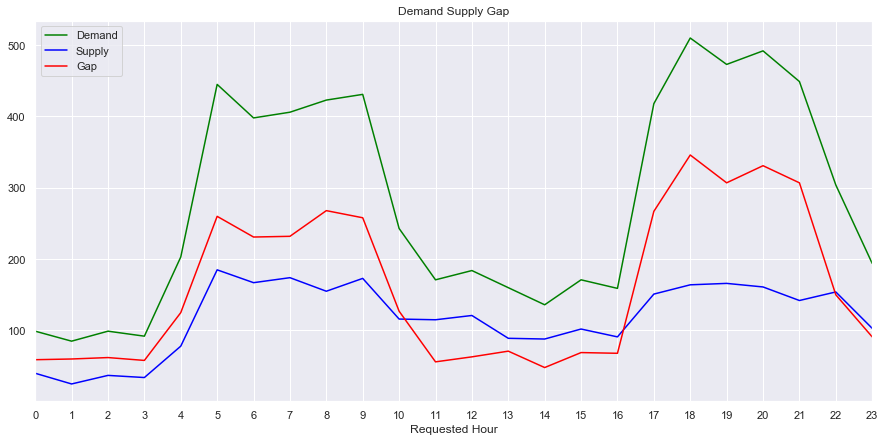

In [27]:
#overall
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(15,7))
plt.xticks([i for i in uber_sdg.index])

plt.title('Demand Supply Gap')
uber_sdg['Demand'].plot(ax=ax, label='Demand',c='green')
uber_sdg['Supply'].plot(ax=ax, label='Supply',c='blue')
uber_sdg['Gap'].plot(ax=ax, label='Gap',c='red')

plt.legend()

plt.show()

In [28]:
uber_sdg.head()

,Demand,Supply,Gap,Requested Hour,time_slot
Requested Hour,,,,,
0,99,40,59,0,Late Night
1,85,25,60,1,Late Night
2,99,37,62,2,Late Night
3,92,34,58,3,Late Night
4,203,78,125,4,Early Morning


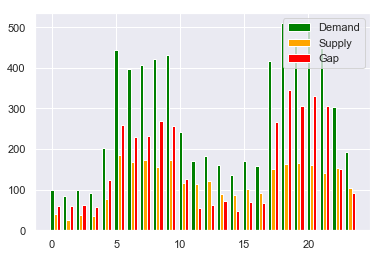

In [29]:
#plt.style.use('ggplot')
# set width of bar
barWidth = 0.25


r1 = np.arange(len(uber_sdg.index))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]



plt.bar(r1, uber_sdg['Demand'], barWidth, label='Demand',color="green")
plt.bar(r2, uber_sdg['Supply'], barWidth,label='Supply',color="orange")
plt.bar(r3, uber_sdg['Gap'], barWidth,label='Gap',color="red")
#plt.xticks([uber_sdg.index + width for r in range(len(uber_sdg.index))])
plt.legend(loc="upper right")
plt.show()

#### 1.0 Find the Peak hours of the day using aggregated request per hour

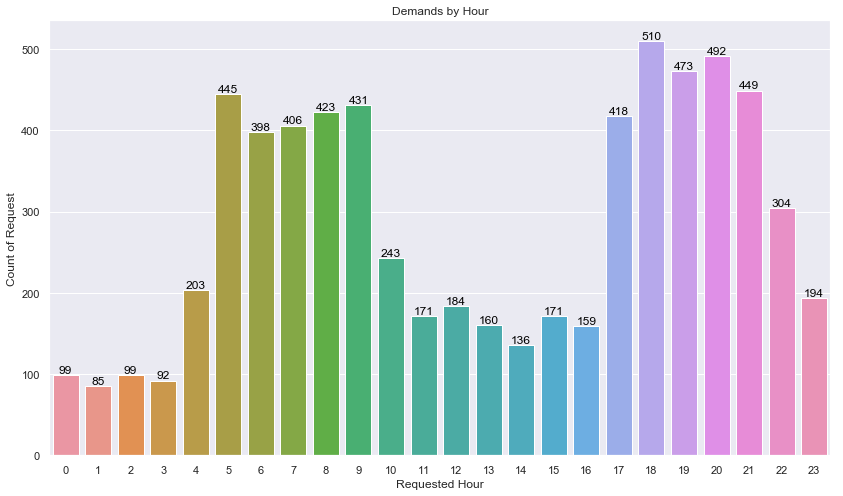

In [30]:
#Graph to show the peak hours based on the requested hour and the count
sns.set(style="darkgrid")
plt.figure(figsize=(14,8))
plt.title('Demands by Hour')
ax =sns.countplot(x="rt_hour", data=uber)
ax.set(xlabel='Requested Hour', ylabel='Count of Request')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

###### Conclusion 1.0
- Morning Peak Hours = 5-10
- Evening Peak Hours = 17-22

#### 1.1 Now distinguish from exactly which pickpoints most of the request are made

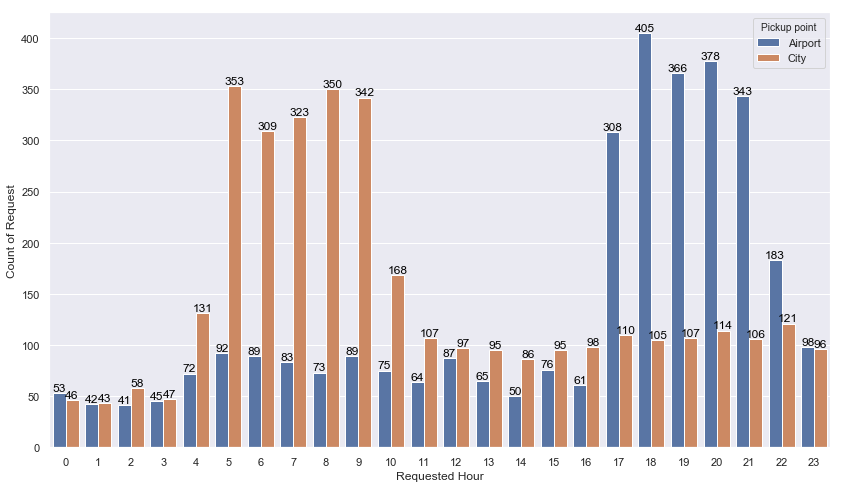

In [31]:
# Aggregate count plot for all days w.r.t to Pickup point
sns.set(style="darkgrid")
plt.figure(figsize=(14,8))
ax =sns.countplot(x="rt_hour",hue="Pickup point",data=uber)
ax.set(xlabel='Requested Hour', ylabel='Count of Request')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

###### Conclusion 1.1 Pick Point
- Morning Peak Hours = 5-10 = City
- Evening Peak Hours = 17-22 = Airport

#### 1.2 Now distinguish what are the status at the Peak time for both Morning and Evening

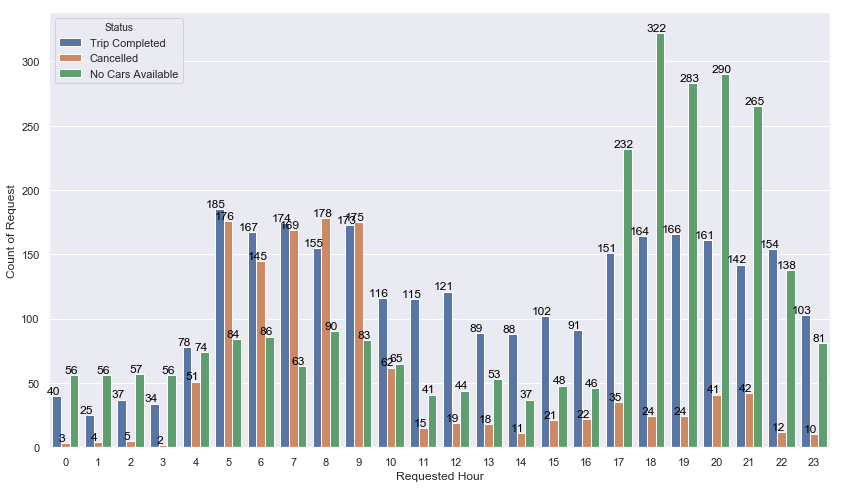

In [32]:
# Aggregate count plot for all days w.r.t to Pickup point
sns.set(style="darkgrid")
plt.figure(figsize=(14,8))
ax =sns.countplot(x="rt_hour",hue="Status",data=uber)
ax.set(xlabel='Requested Hour', ylabel='Count of Request')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/8., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

###### Conclusion 1.2 Status
- Morning Peak Hours = 5-10 = Trip Completed & Cancelled
- Evening Peak Hours = 17-22 = No Cars Available

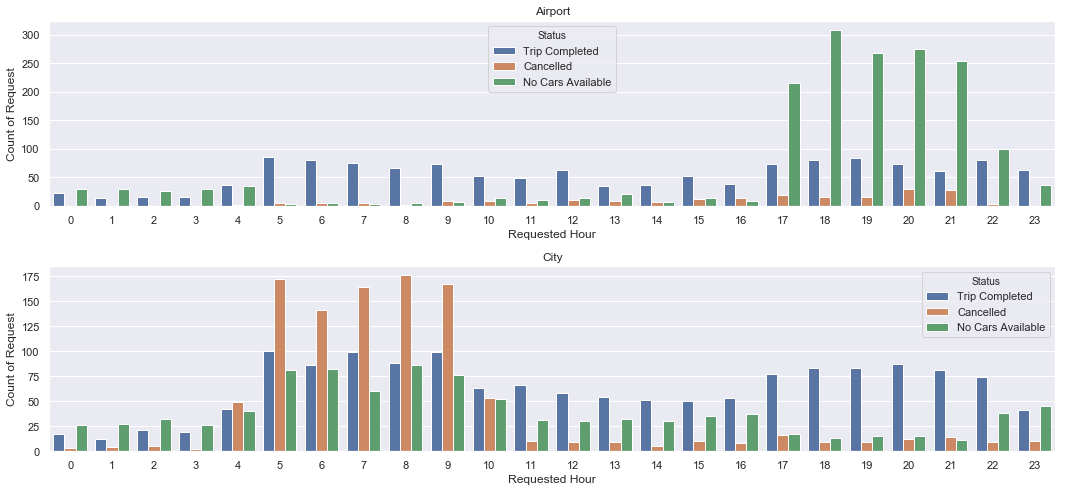

In [33]:
# Aggregate count plot for all days w.r.t to Pickup point
sns.set(style="darkgrid")
plt.figure(figsize=(15,7))
plt.subplot(2,1,1)
plt.title('Airport')
ax =sns.countplot(x="rt_hour",hue="Status",data=uber[uber['Pickup point']=='Airport'])
ax.set(xlabel='Requested Hour', ylabel='Count of Request')

plt.subplot(2,1,2)
plt.title('City')

ax =sns.countplot(x="rt_hour",hue="Status",data=uber[uber['Pickup point']=='City'])
ax.set(xlabel='Requested Hour', ylabel='Count of Request')
plt.tight_layout()
plt.show()

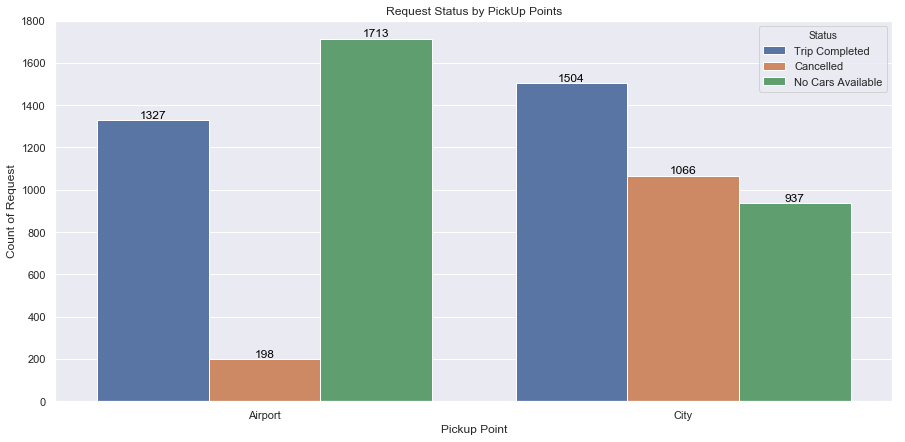

In [34]:
#create a plot w.r.t the pickup points and the status 
sns.set(style="darkgrid")
plt.figure(figsize=(15,7))
plt.title('Request Status by PickUp Points')
ax =sns.countplot(x='Pickup point',hue="Status",data=uber)
ax.set(xlabel='Pickup Point', ylabel='Count of Request')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

### Combining the Conclusion of the 3 Diagram mentioned above 
- On Morning Peak Hours ,trips from City to Airport are mostly Cancelled by the Driver
- On Evening Peak Hours ,"No Cars Available" from Airport.

### Diving Deep into the analsyis of why there is an issue

In [35]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,rt_date,rt_hour,rt_time,rt_weekday,dt_hour,dt_date,dt_time
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11,11:51:00,Monday,13.0,2016-07-11,13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17,17:57:00,Monday,18.0,2016-07-11,18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,9,09:17:00,Tuesday,9.0,2016-07-12,09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21,21:08:00,Tuesday,22.0,2016-07-12,22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00,2016-07-13,8,08:33:00,Wednesday,9.0,2016-07-13,09:25:00


In [36]:
#Create another column names timeslot 
uber["time_slot"] = uber.rt_hour.apply(lambda x: time_slot(x))

In [37]:
#check any null timeslots?
uber[uber['time_slot'].isnull()]

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,rt_date,rt_hour,rt_time,rt_weekday,dt_hour,dt_date,dt_time,time_slot


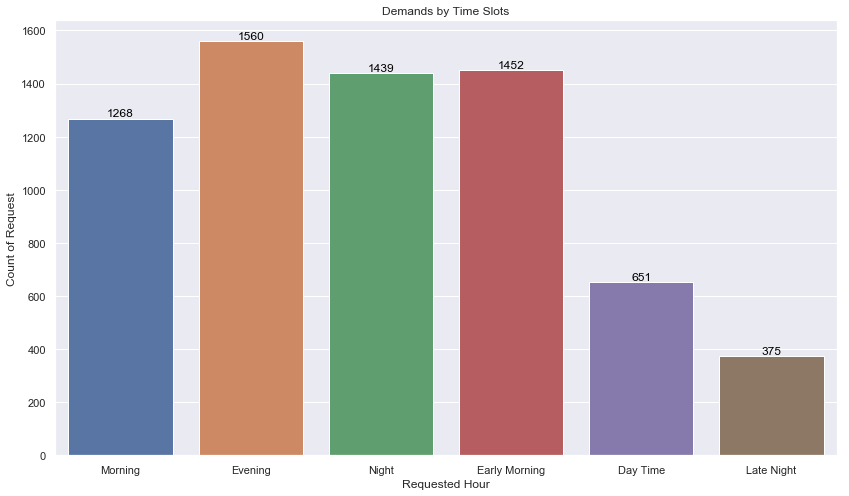

In [38]:
#Plot to show the Demands by Time Slots
sns.set(style="darkgrid")
plt.figure(figsize=(14,8))
plt.title('Demands by Time Slots')
ax =sns.countplot(x='time_slot', data=uber)
ax.set(xlabel='Requested Hour', ylabel='Count of Request')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

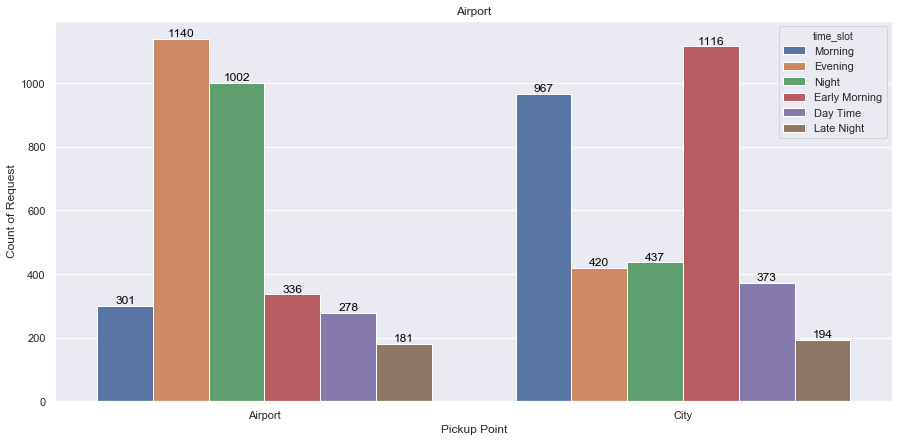

In [39]:
#Plot based on the PickupPlot and the timeslot
sns.set(style="darkgrid")
plt.figure(figsize=(15,7))
plt.title('Airport')
ax =sns.countplot(x='Pickup point',hue="time_slot",data=uber)
ax.set(xlabel='Pickup Point', ylabel='Count of Request')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

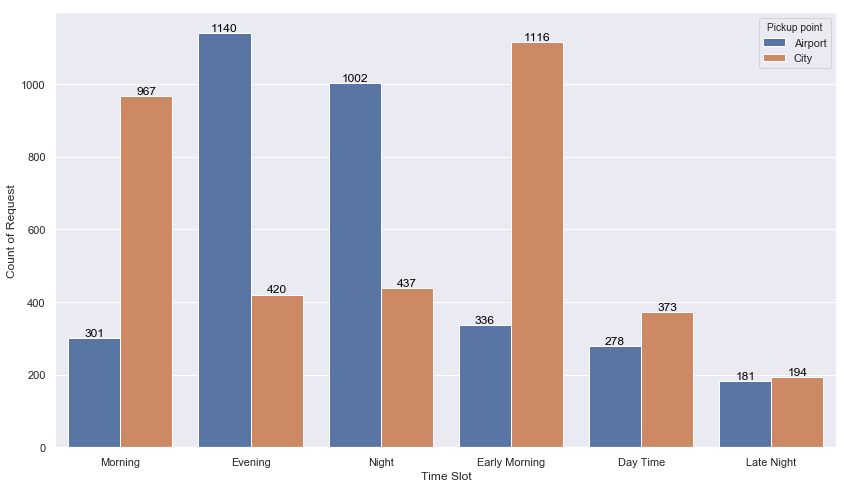

In [40]:
# Aggregate count plot for all days w.r.t to Pickup point & Timeslot
sns.set(style="darkgrid")
plt.figure(figsize=(14,8))
ax =sns.countplot(x="time_slot",hue="Pickup point",data=uber)
ax.set(xlabel='Time Slot', ylabel='Count of Request')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

ValueError: cannot convert float NaN to integer

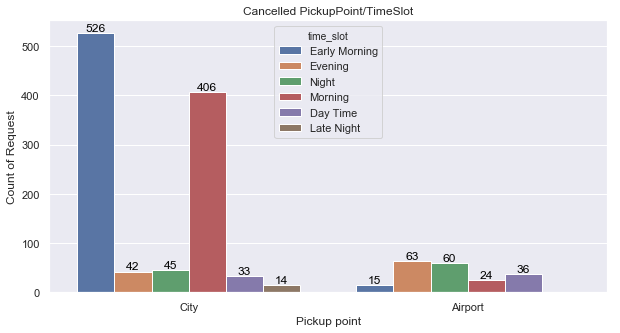

In [41]:
# Cancelled based on timeSlot and Pickup Point
sns.set(style="darkgrid")
plt.figure(figsize=(10,5))
ax =sns.countplot(x="Pickup point",hue="time_slot",data=uber[uber['Status']=='Cancelled'])
ax.set(xlabel='Pickup point', ylabel='Count of Request')
plt.title("Cancelled PickupPoint/TimeSlot")

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

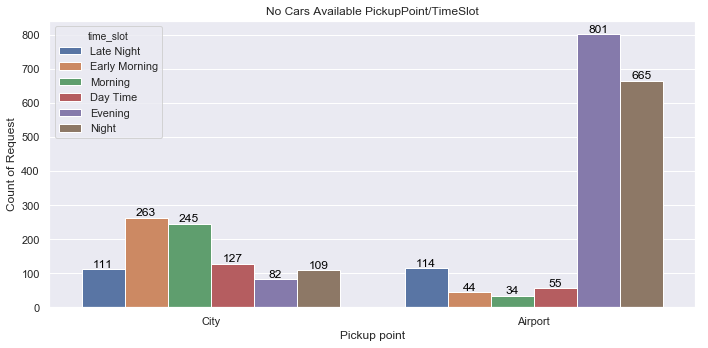

In [42]:
# No cars available based on timeSlot and Pickup Point
sns.set(style="darkgrid")
plt.figure(figsize=(10,5))
ax =sns.countplot(x="Pickup point",hue="time_slot",data=uber[uber['Status']=='No Cars Available'])
ax.set(xlabel='Pickup point', ylabel='Count of Request')
plt.title("No Cars Available PickupPoint/TimeSlot")
plt.tight_layout()
#plt.show()

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

ValueError: cannot convert float NaN to integer

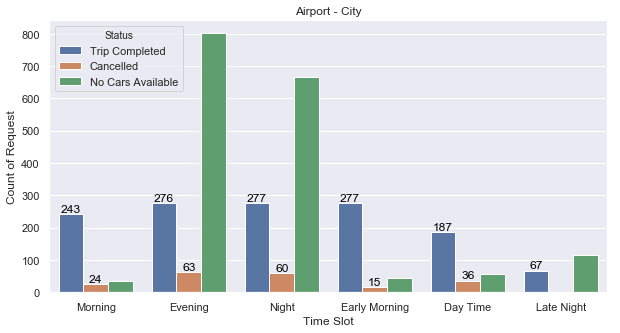

In [43]:
#Status plot based on the Pickup from Aiport 
sns.set(style="darkgrid")
plt.figure(figsize=(10,5))
ax =sns.countplot(x="time_slot",hue="Status",data=uber[uber['Pickup point']=='Airport'])
ax.set(xlabel='Time Slot', ylabel='Count of Request')
plt.title("Airport - City")

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

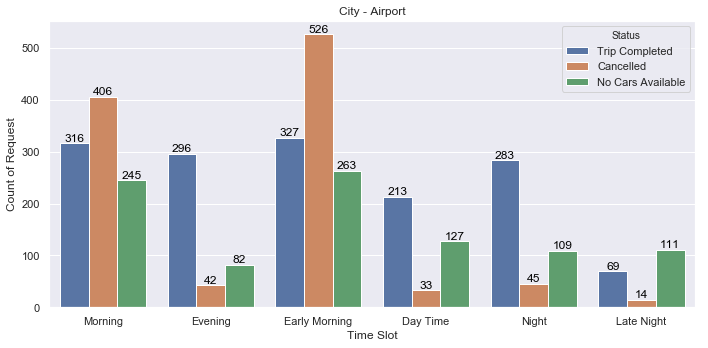

In [44]:
#Status plot based on the Pickup from City 
sns.set(style="darkgrid")
plt.figure(figsize=(10,5))
ax =sns.countplot(x="time_slot",hue="Status",data=uber[uber['Pickup point']=='City'])
ax.set(xlabel='Time Slot', ylabel='Count of Request')
plt.title("City - Airport")
plt.tight_layout()
#plt.show()

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')